In [ ]:
from PIL import Image

from keras import models 
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.xception import (Xception, preprocess_input, decode_predictions)

In [ ]:
folderpath = '../Keras/data/train'
img = 'test2.png'
image_size = (150, 150)

'1DGE'

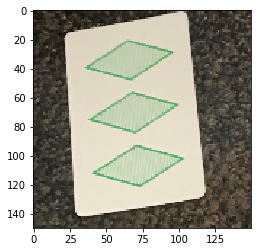

In [21]:
# Create and model and load weights

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(81))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.load_weights("first_try.h5")


# datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)    

In [20]:
# Refactor above steps into reusable function
def find_label(index):
    return [v for v in os.listdir(folderpath) if v != '.DS_Store'][index]


def compare(a, t):
    i1, v1 = a
    i2, v2 = t
    if v2 > v1:
        return t
    else:
        return a

def predict(image_path, model):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
#     print(x.shape)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    index = reduce(compare, enumerate(predictions))[0]
    return find_label(index)


